### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
data=pd.read_csv('PHQ-9_Dataset_5th Edition.csv')

In [3]:
data.head()

,Age,Gender,Little interest or pleasure in doing things,"Feeling down, depressed, or hopeless","Trouble falling or staying asleep, or sleeping too much",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself—or that you are a failure or have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have noticed? Or the opposite—being so fidgety or restless that you have been moving around a lot more than usual,Thoughts that you would be better off dead or of hurting yourself in some way,PHQ_Total,PHQ_Severity,Sleep Quality,Study Pressure,Financial Pressure
0,22,Male,More than half the days,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,More than half the days,Not at all,4,Minimal,Good,Good,Average
1,25,Male,Not at all,Not at all,Nearly every day,Nearly every day,Nearly every day,Not at all,More than half the days,More than half the days,More than half the days,15,Moderately severe,Worst,Bad,Average
2,22,Female,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Several days,Not at all,Not at all,1,Minimal,Average,Bad,Average
3,18,Female,Nearly every day,Nearly every day,Not at all,Nearly every day,More than half the days,Not at all,Not at all,Not at all,Not at all,11,Moderate,Average,Bad,Worst
4,24,Male,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,More than half the days,Not at all,2,Minimal,Good,Average,Good


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 16 columns):
 #   Column                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                    --------------  ----- 
 0   Age                                                                                                                                                                       682 non-null    int64 
 1   Gender                                                                                                                                                                    682 non-null    object
 2   Little interest or pleasure in doing things                                                       

In [5]:
data.isnull().sum()

Age                                                                                                                                                                         0
Gender                                                                                                                                                                      0
Little interest or pleasure in doing things                                                                                                                                 0
  Feeling down, depressed, or hopeless                                                                                                                                      0
  Trouble falling or staying asleep, or sleeping too much                                                                                                                   0
  Feeling tired or having little energy                                                                                           

In [6]:
data.columns

Index(['Age', 'Gender', 'Little interest or pleasure in doing things ',
       '  Feeling down, depressed, or hopeless  ',
       '  Trouble falling or staying asleep, or sleeping too much  ',
       '  Feeling tired or having little energy  ',
       '  Poor appetite or overeating  ',
       'Feeling bad about yourself—or that you are a failure or have let yourself or your family down  ',
       'Trouble concentrating on things, such as reading the newspaper or watching television  ',
       'Moving or speaking so slowly that other people could have noticed? Or the opposite—being so fidgety or restless that you have been moving around a lot more than usual  ',
       'Thoughts that you would be better off dead or of hurting yourself in some way  ',
       'PHQ_Total', 'PHQ_Severity', 'Sleep Quality', 'Study Pressure',
       'Financial Pressure'],
      dtype='object')

In [7]:
# Rename columns to shorter, more manageable names
data.columns = ['Age', 'Gender', 'Interest_Pleasure', 'Feeling_Down', 
                'Sleep_Trouble', 'Tired_Low_Energy', 'Appetite_Issues',
                'Feeling_Bad_About_Self', 'Concentration_Trouble', 
                'Moving_Speaking_Issues', 'Thoughts_Self_Harm',
                'PHQ_Total', 'PHQ_Severity', 'Sleep_Quality', 
                'Study_Pressure', 'Financial_Pressure']


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     682 non-null    int64 
 1   Gender                  682 non-null    object
 2   Interest_Pleasure       682 non-null    object
 3   Feeling_Down            682 non-null    object
 4   Sleep_Trouble           682 non-null    object
 5   Tired_Low_Energy        682 non-null    object
 6   Appetite_Issues         682 non-null    object
 7   Feeling_Bad_About_Self  682 non-null    object
 8   Concentration_Trouble   682 non-null    object
 9   Moving_Speaking_Issues  682 non-null    object
 10  Thoughts_Self_Harm      682 non-null    object
 11  PHQ_Total               682 non-null    int64 
 12  PHQ_Severity            682 non-null    object
 13  Sleep_Quality           682 non-null    object
 14  Study_Pressure          682 non-null    object
 15  Financ

### EDA

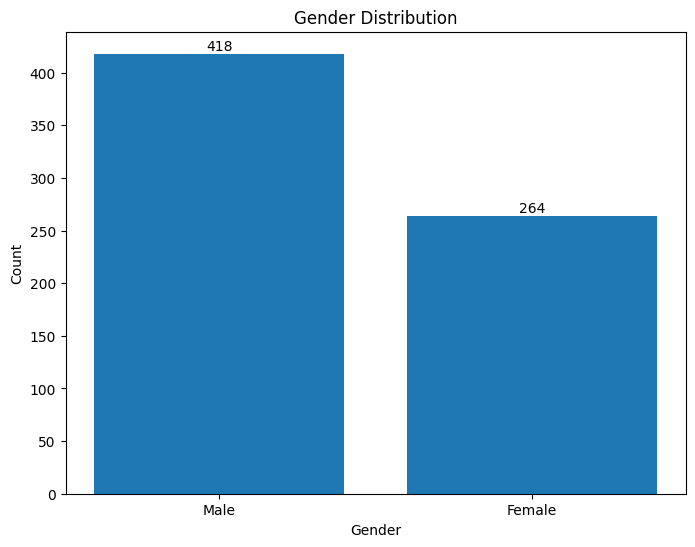

In [9]:
# Show gender distribution
import matplotlib.pyplot as plt

gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8, 6))
bars = plt.bar(gender_counts.index, gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add numbers at the top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.show()

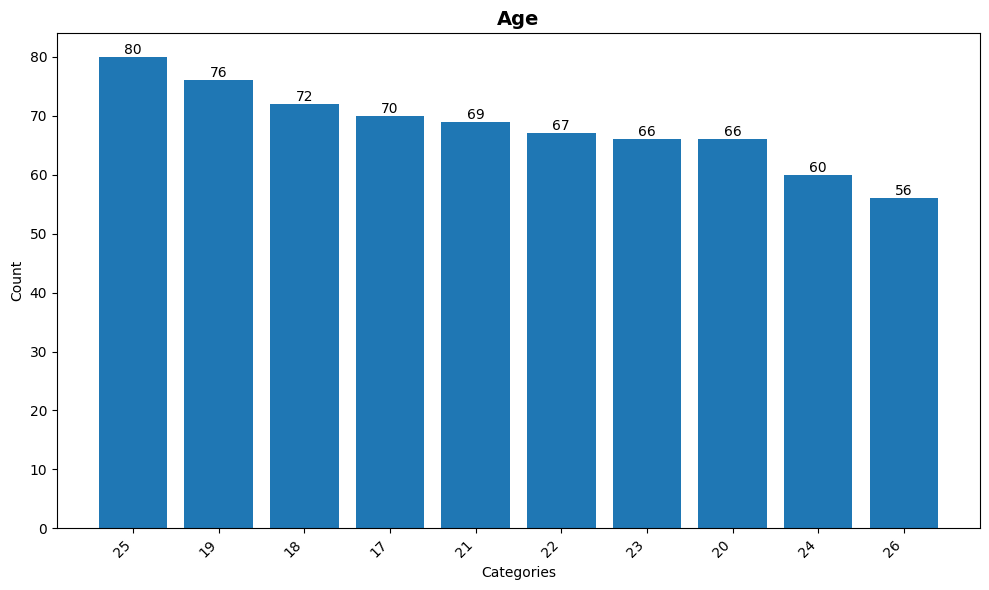

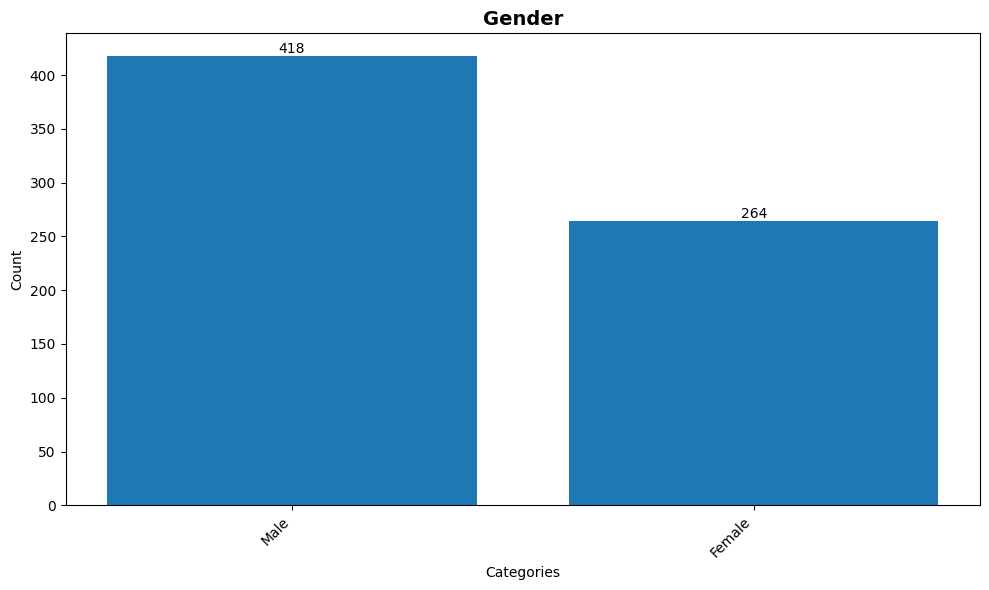

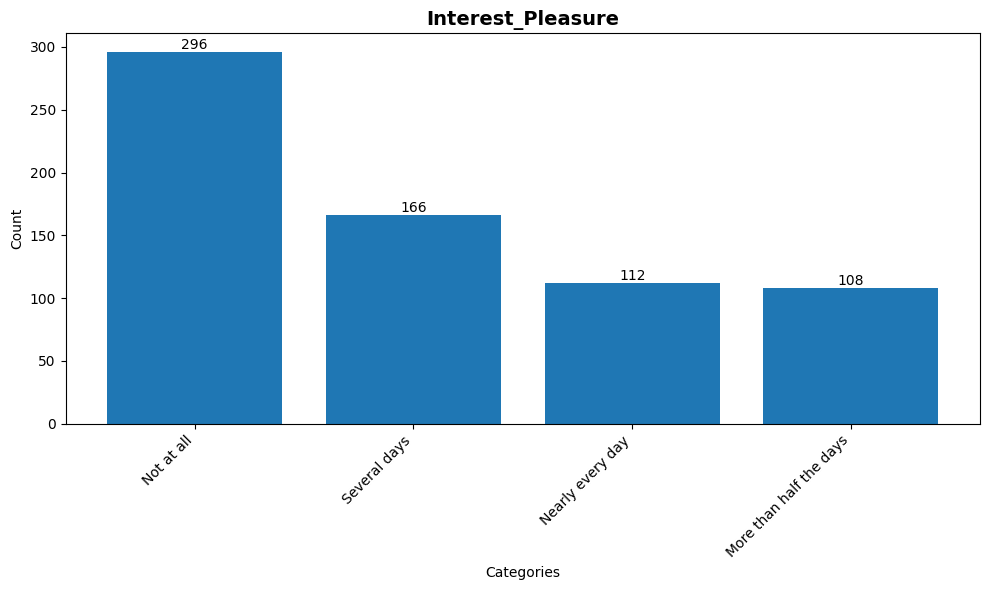

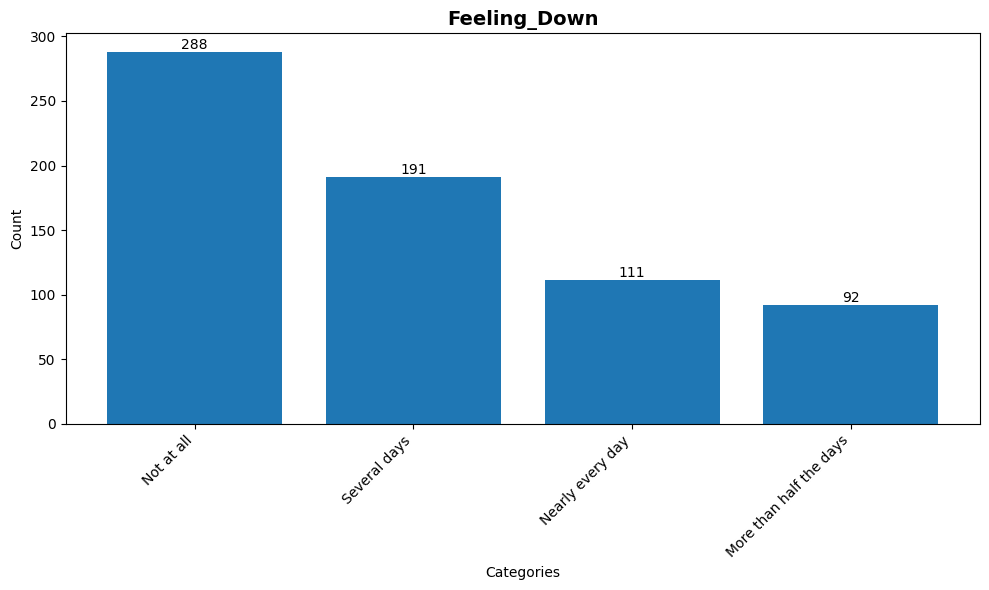

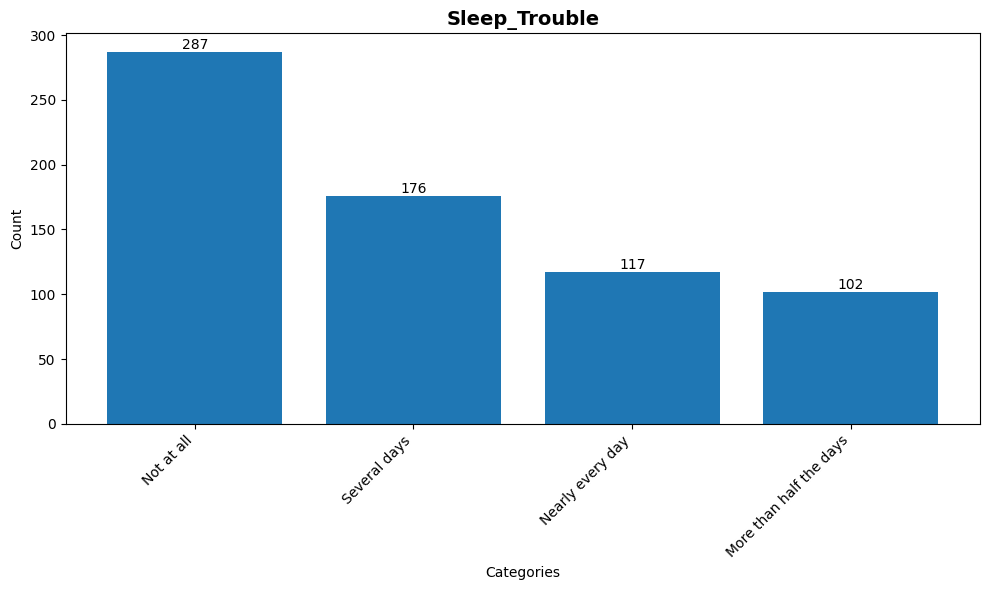

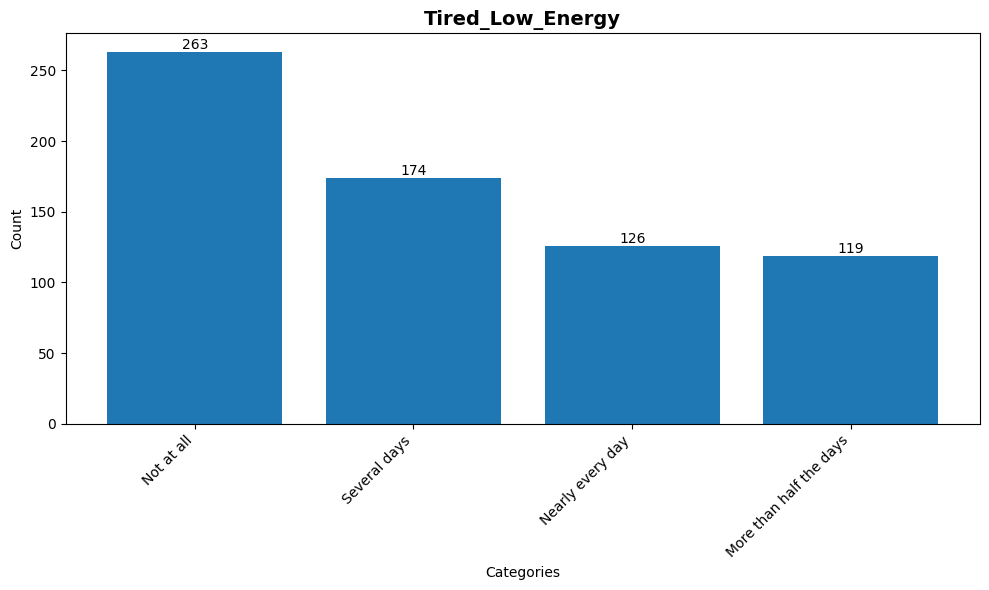

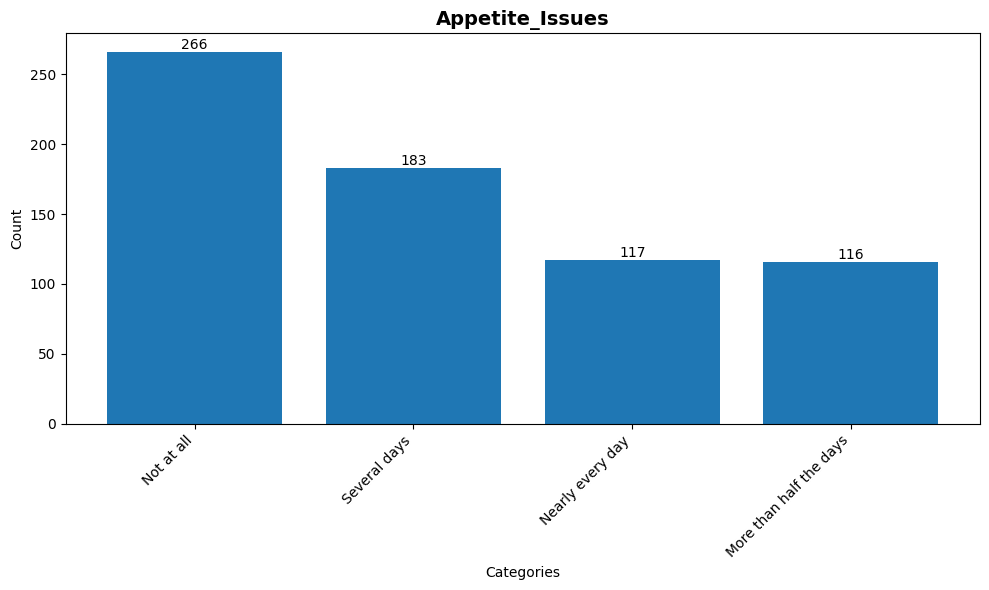

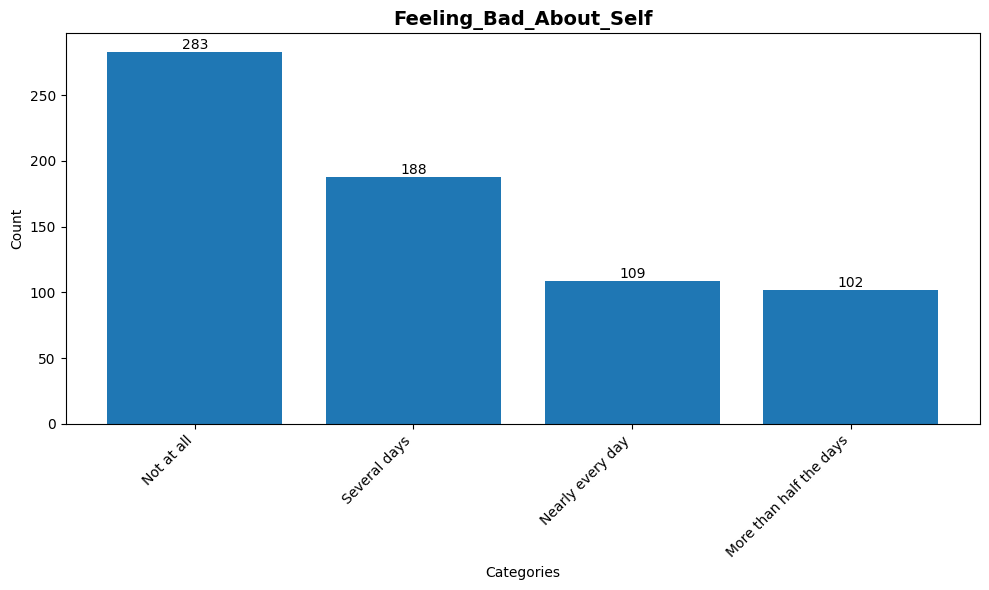

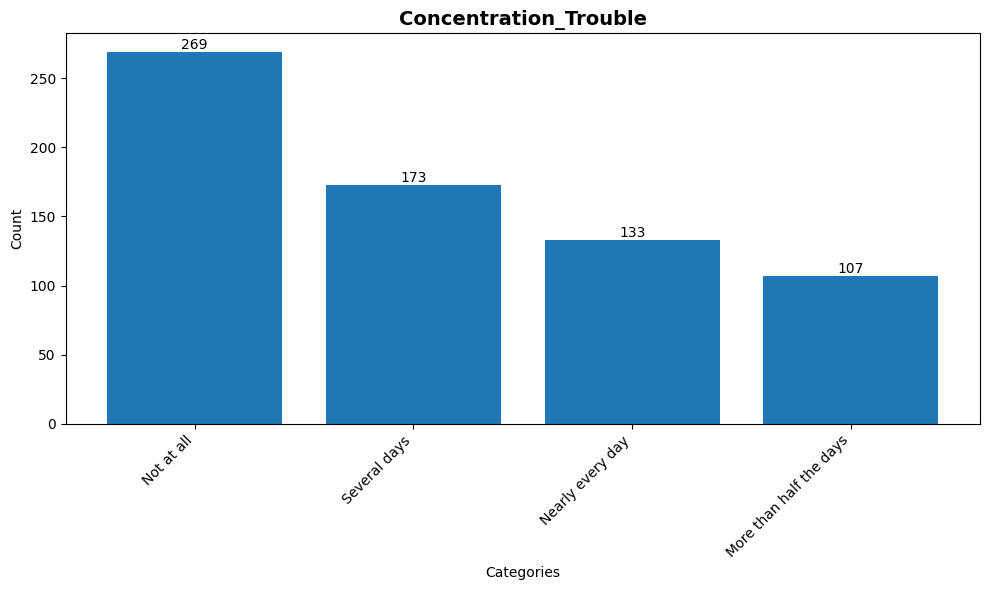

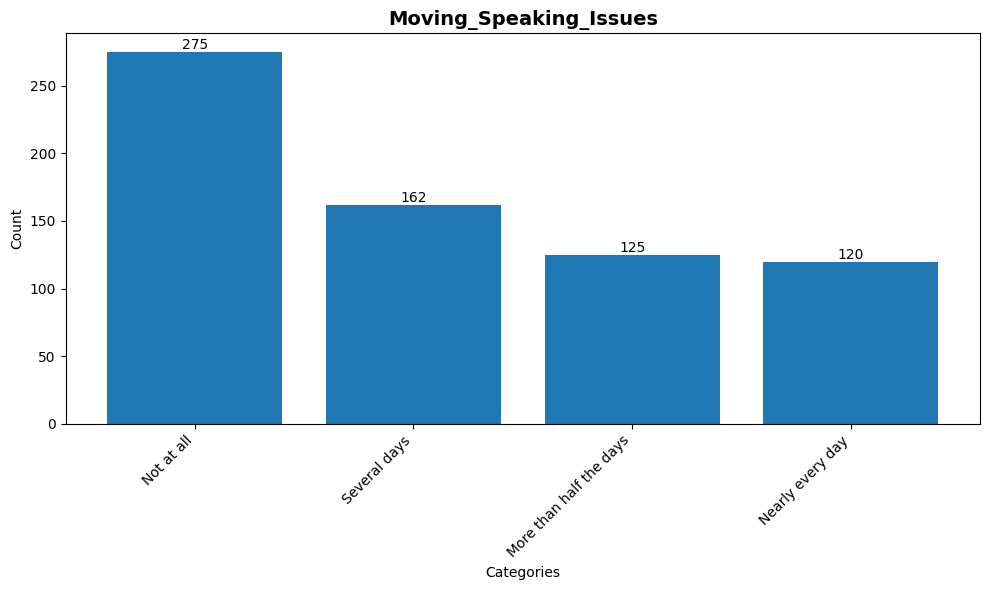

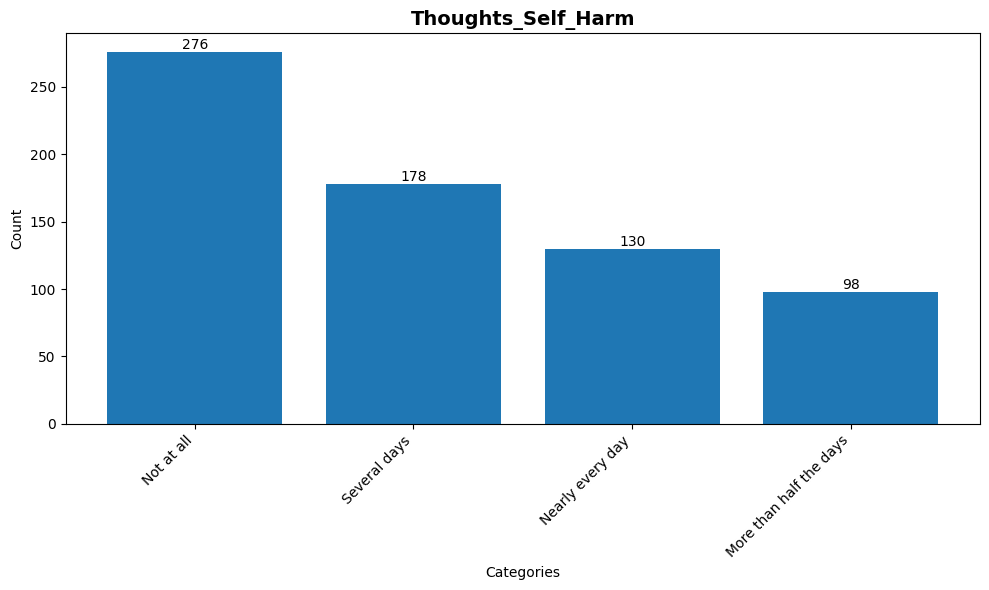

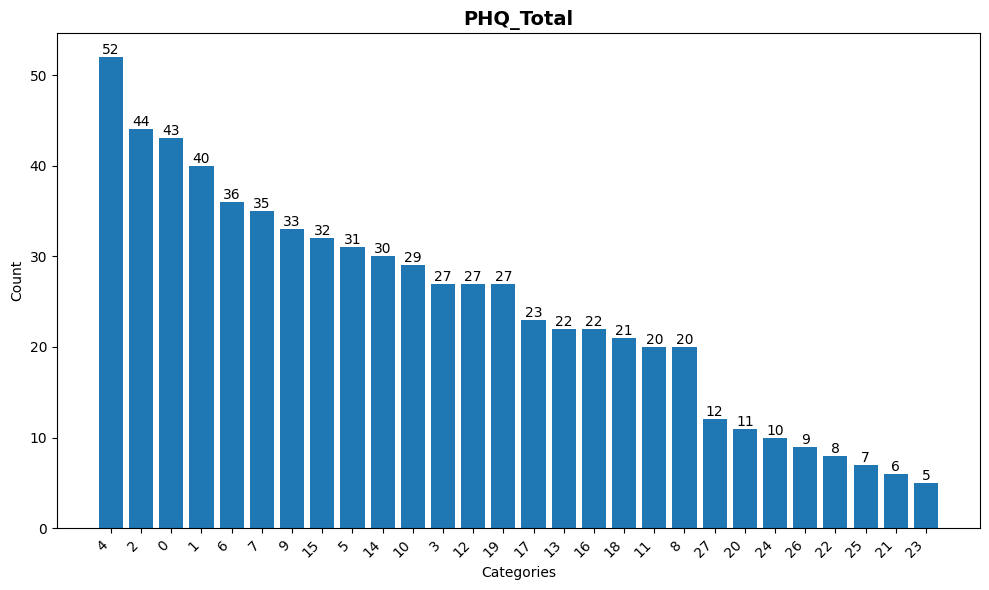

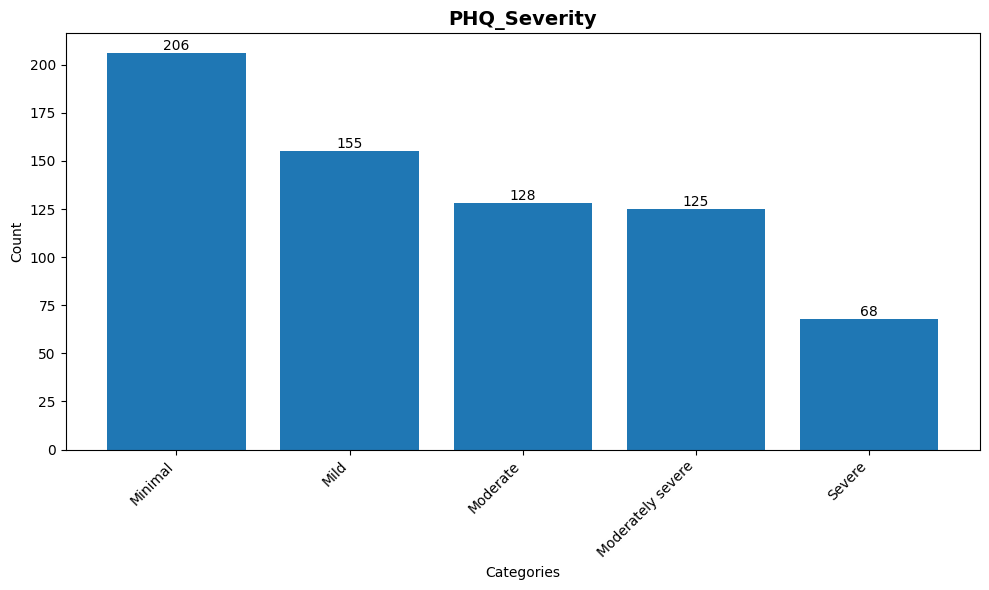

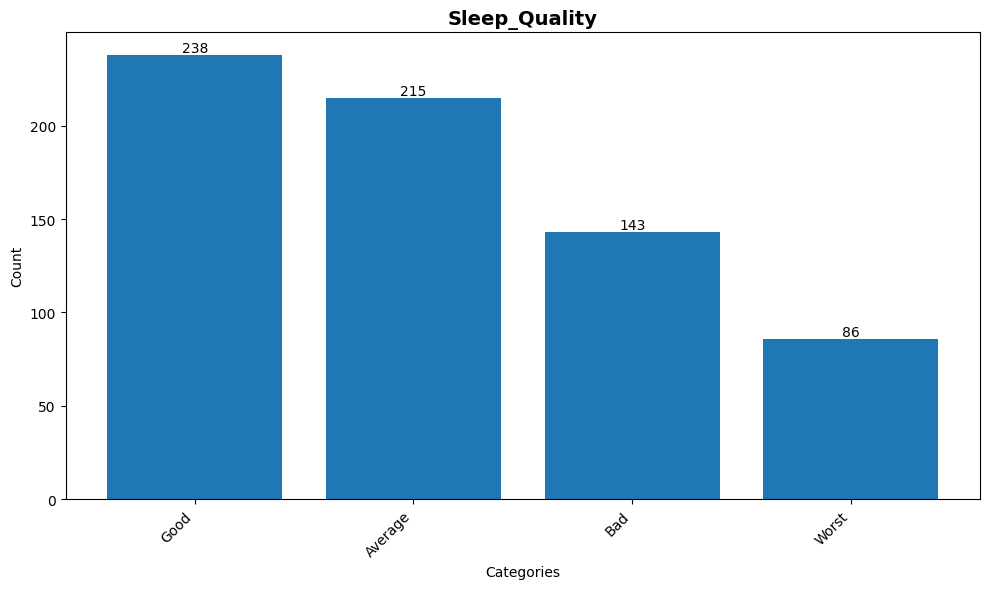

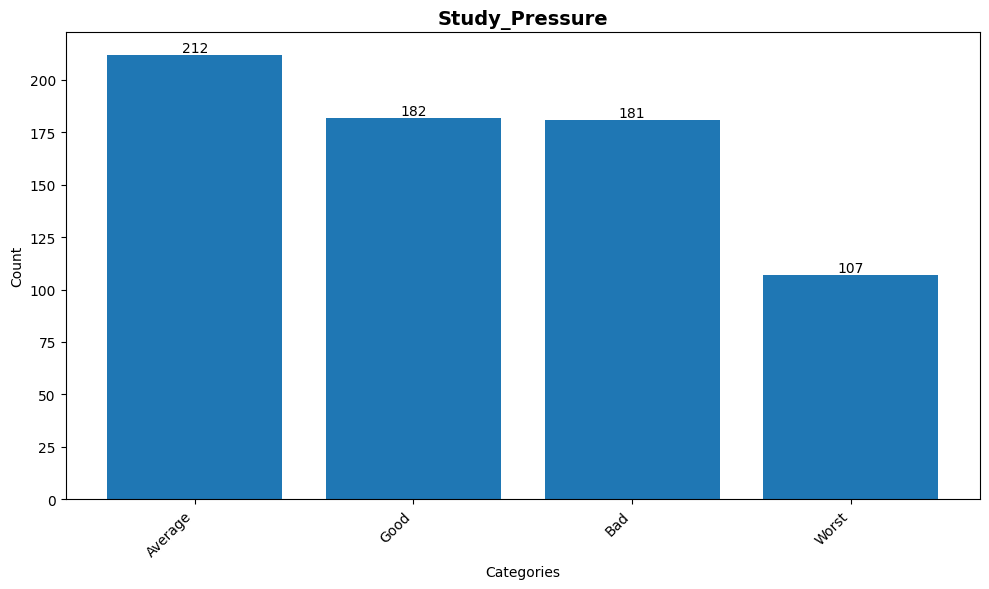

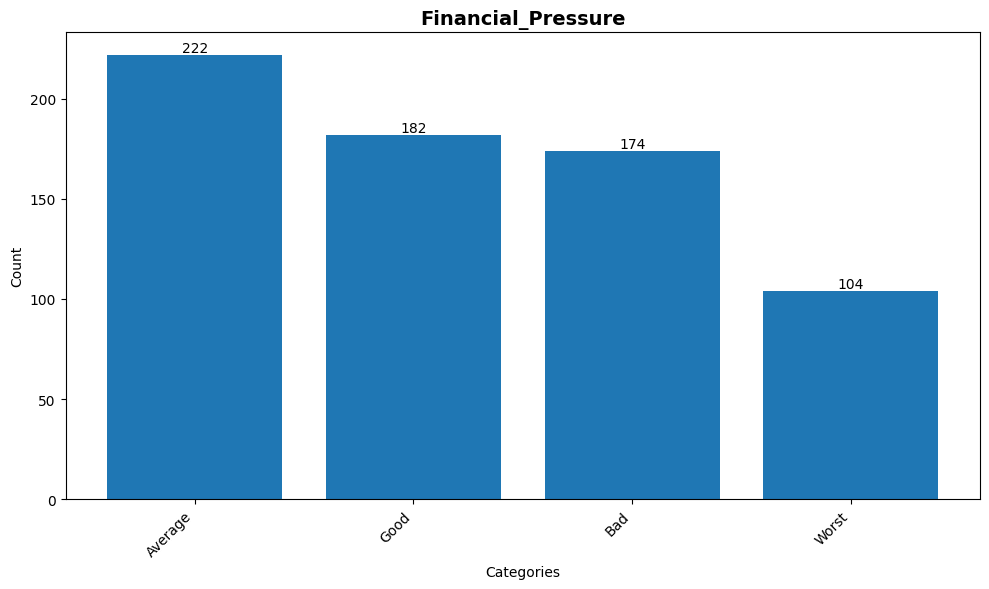

In [10]:
# Create count plots for all columns in the dataset - each in separate diagrams
import matplotlib.pyplot as plt
import seaborn as sns

# Get all column names
columns = data.columns.tolist()

# Create separate plot for each column
for column in columns:
    plt.figure(figsize=(10, 6))
    
    # Get value counts
    value_counts = data[column].value_counts()
    
    # Create bar plot
    bars = plt.bar(range(len(value_counts)), value_counts.values)
    plt.title(f'{column}', fontsize=14, fontweight='bold')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    
    # Set x-axis labels
    plt.xticks(range(len(value_counts)), value_counts.index, rotation=45, ha='right')
    
    # Add count labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()


In [11]:
data.isnull().sum()

Age                       0
Gender                    0
Interest_Pleasure         0
Feeling_Down              0
Sleep_Trouble             0
Tired_Low_Energy          0
Appetite_Issues           0
Feeling_Bad_About_Self    0
Concentration_Trouble     0
Moving_Speaking_Issues    0
Thoughts_Self_Harm        0
PHQ_Total                 0
PHQ_Severity              0
Sleep_Quality             0
Study_Pressure            0
Financial_Pressure        0
dtype: int64

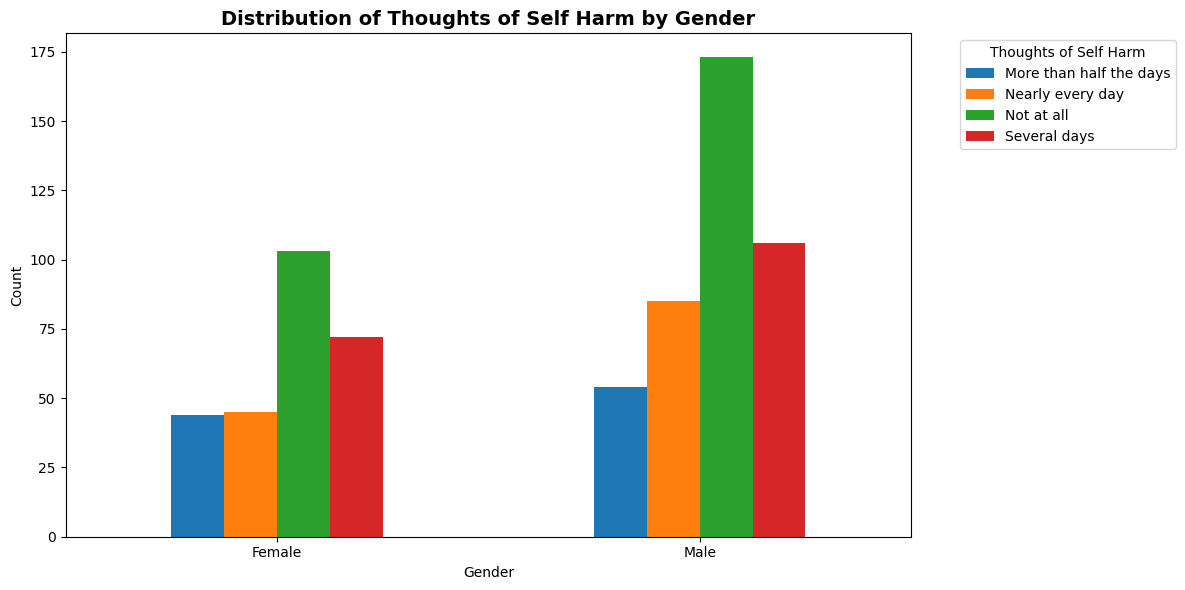

In [14]:
# Distribution of thoughts of self harm between men and women
import matplotlib.pyplot as plt
import seaborn as sns

# Create a cross-tabulation using the renamed column
cross_tab = pd.crosstab(data['Gender'], data['Thoughts_Self_Harm'])

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
cross_tab.plot(kind='bar', ax=plt.gca())
plt.title('Distribution of Thoughts of Self Harm by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Thoughts of Self Harm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


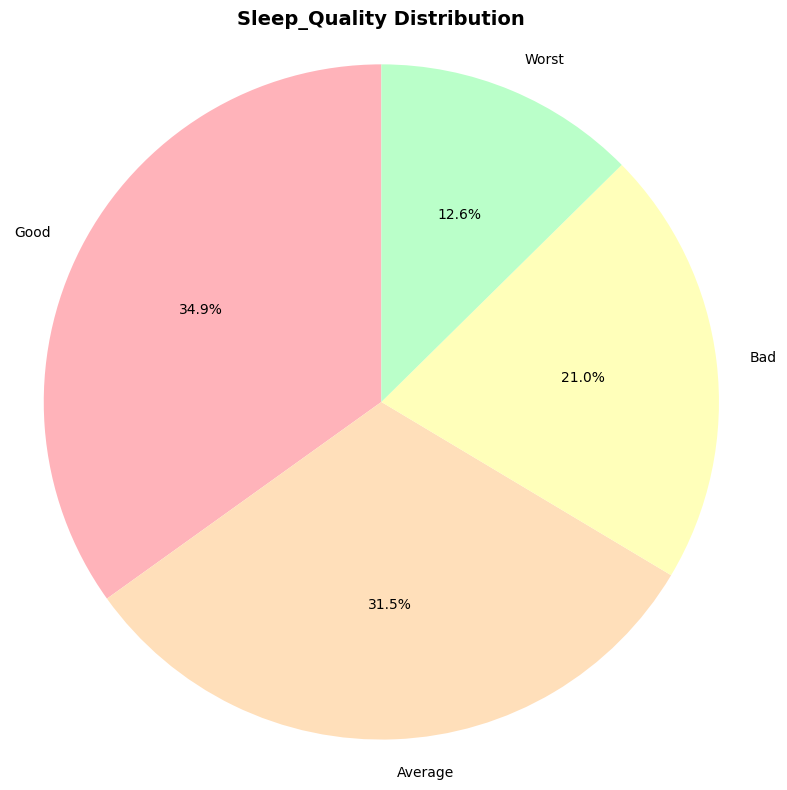

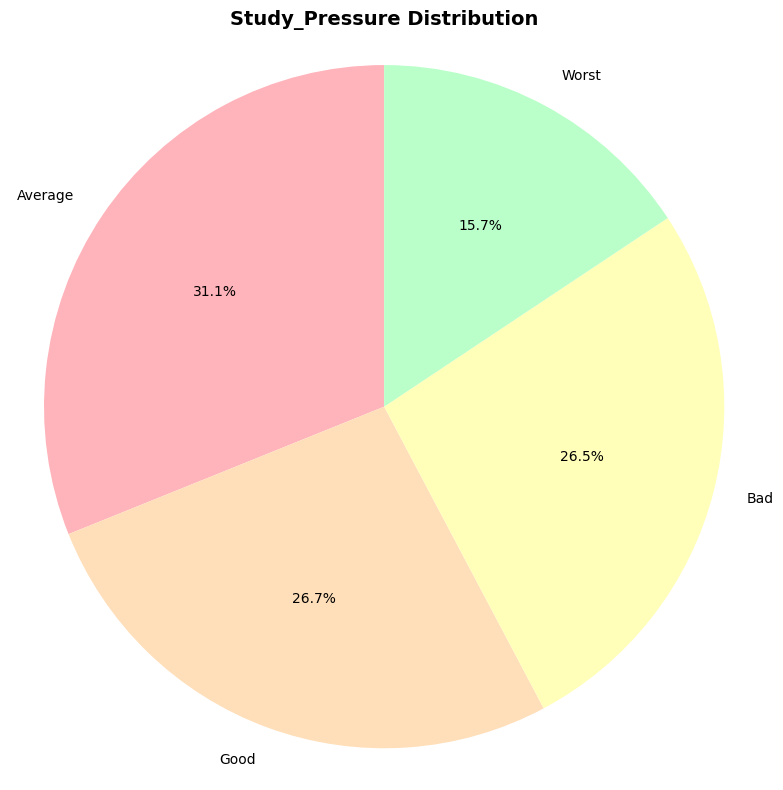

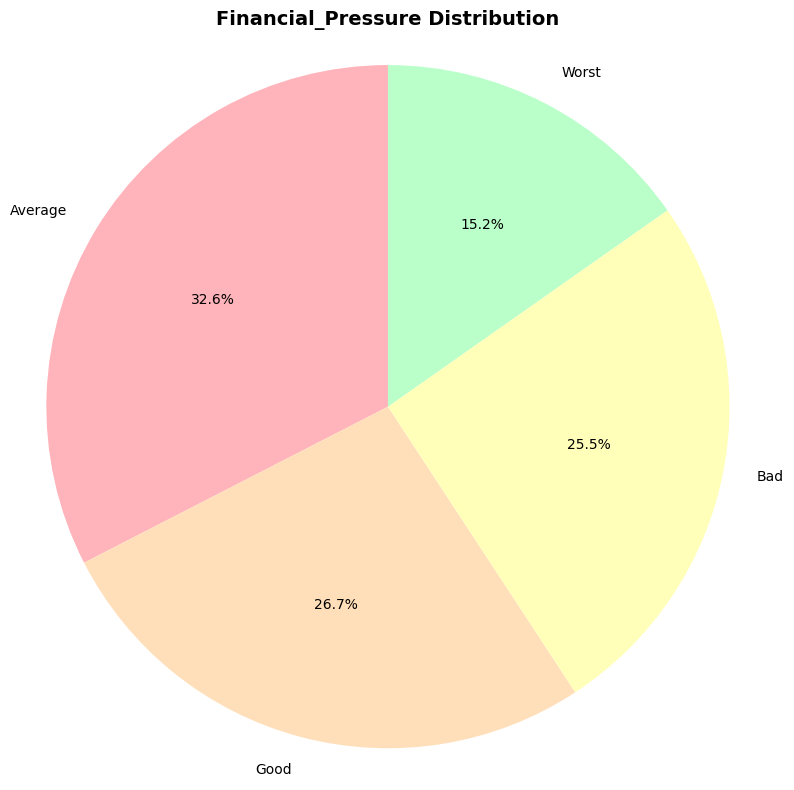

In [15]:
# Create pie charts for Sleep_Quality, Study_Pressure, and Financial_Pressure
import matplotlib.pyplot as plt

# List of columns to create pie charts for (excluding PHQ_Severity since it was dropped)
pie_columns = ['Sleep_Quality', 'Study_Pressure', 'Financial_Pressure']

# Define pastel colors
pastel_colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF', '#E1BAFF', '#FFBAE1', '#C9BAFF']

# Create separate pie chart for each column
for column in pie_columns:
    if column in data.columns:  # Check if column exists in the dataframe
        plt.figure(figsize=(8, 8))
        
        # Get value counts
        value_counts = data[column].value_counts()
        
        # Create pie chart with pastel colors
        plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=pastel_colors[:len(value_counts)])
        plt.title(f'{column} Distribution', fontsize=14, fontweight='bold')
        
        # Equal aspect ratio ensures that pie is drawn as a circle
        plt.axis('equal')
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{column}' not found in the dataset")

### Data Preprocessing

In [16]:
# Drop the Age column from the dataset
data = data.drop(['Age', 'PHQ_Total','PHQ_Severity'], axis=1)

In [17]:
# Perform encoding for categorical variables
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# List of categorical columns that need encoding
categorical_columns = ['Gender', 'Interest_Pleasure', 'Feeling_Down', 'Sleep_Trouble', 
                      'Tired_Low_Energy', 'Appetite_Issues', 'Feeling_Bad_About_Self',
                      'Concentration_Trouble', 'Moving_Speaking_Issues', 'Thoughts_Self_Harm',
                      'PHQ_Severity', 'Sleep_Quality', 'Study_Pressure', 'Financial_Pressure']

# Apply label encoding to each categorical column
for column in categorical_columns:
    if column in data.columns:
        data[column] = le.fit_transform(data[column])

# Display the first few rows to verify encoding
print("Data after encoding:")
print(data.head())

# Check data types after encoding
print("\nData types after encoding:")
print(data.dtypes)


Data after encoding:
   Gender  Interest_Pleasure  Feeling_Down  Sleep_Trouble  Tired_Low_Energy  \
0       1                  0             2              2                 2   
1       1                  2             2              1                 1   
2       0                  2             2              2                 2   
3       0                  1             1              2                 1   
4       1                  2             2              2                 2   

   Appetite_Issues  Feeling_Bad_About_Self  Concentration_Trouble  \
0                2                       2                      2   
1                1                       2                      0   
2                2                       2                      3   
3                0                       2                      2   
4                2                       2                      2   

   Moving_Speaking_Issues  Thoughts_Self_Harm  Sleep_Quality  Study_Pressure  \
0        

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  682 non-null    int64
 1   Interest_Pleasure       682 non-null    int64
 2   Feeling_Down            682 non-null    int64
 3   Sleep_Trouble           682 non-null    int64
 4   Tired_Low_Energy        682 non-null    int64
 5   Appetite_Issues         682 non-null    int64
 6   Feeling_Bad_About_Self  682 non-null    int64
 7   Concentration_Trouble   682 non-null    int64
 8   Moving_Speaking_Issues  682 non-null    int64
 9   Thoughts_Self_Harm      682 non-null    int64
 10  Sleep_Quality           682 non-null    int64
 11  Study_Pressure          682 non-null    int64
 12  Financial_Pressure      682 non-null    int64
dtypes: int64(13)
memory usage: 69.4 KB


### Feature Engineering

In [19]:
# List of symptom columns
symptom_cols = ['Interest_Pleasure', 'Feeling_Down', 'Sleep_Trouble', 'Tired_Low_Energy',
                'Appetite_Issues', 'Feeling_Bad_About_Self', 'Concentration_Trouble',
                'Moving_Speaking_Issues', 'Thoughts_Self_Harm']

# Calculate total symptom score (sum over symptom columns)
data['Symptom_Score'] = data[symptom_cols].sum(axis=1)

# Function to assign depression status based on symptom score thresholds
def depression_status(score):
    if score <= 9:
        return 'Not Depressed'
    else:
        return 'Depressed'

# Apply the function to create the new feature
data['Depression Status'] = data['Symptom_Score'].apply(depression_status)

# Preview new feature with symptom scores
print(data[['Symptom_Score', 'Depression Status']].head())

   Symptom_Score Depression Status
0             14         Depressed
1              9     Not Depressed
2             19         Depressed
3             13         Depressed
4             16         Depressed


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  682 non-null    int64 
 1   Interest_Pleasure       682 non-null    int64 
 2   Feeling_Down            682 non-null    int64 
 3   Sleep_Trouble           682 non-null    int64 
 4   Tired_Low_Energy        682 non-null    int64 
 5   Appetite_Issues         682 non-null    int64 
 6   Feeling_Bad_About_Self  682 non-null    int64 
 7   Concentration_Trouble   682 non-null    int64 
 8   Moving_Speaking_Issues  682 non-null    int64 
 9   Thoughts_Self_Harm      682 non-null    int64 
 10  Sleep_Quality           682 non-null    int64 
 11  Study_Pressure          682 non-null    int64 
 12  Financial_Pressure      682 non-null    int64 
 13  Symptom_Score           682 non-null    int64 
 14  Depression Status       682 non-null    object
dtypes: int

In [21]:
# Perform encoding for categorical variables
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

data['Depression Status'] = le.fit_transform(data['Depression Status'])

### Correlation Matrix

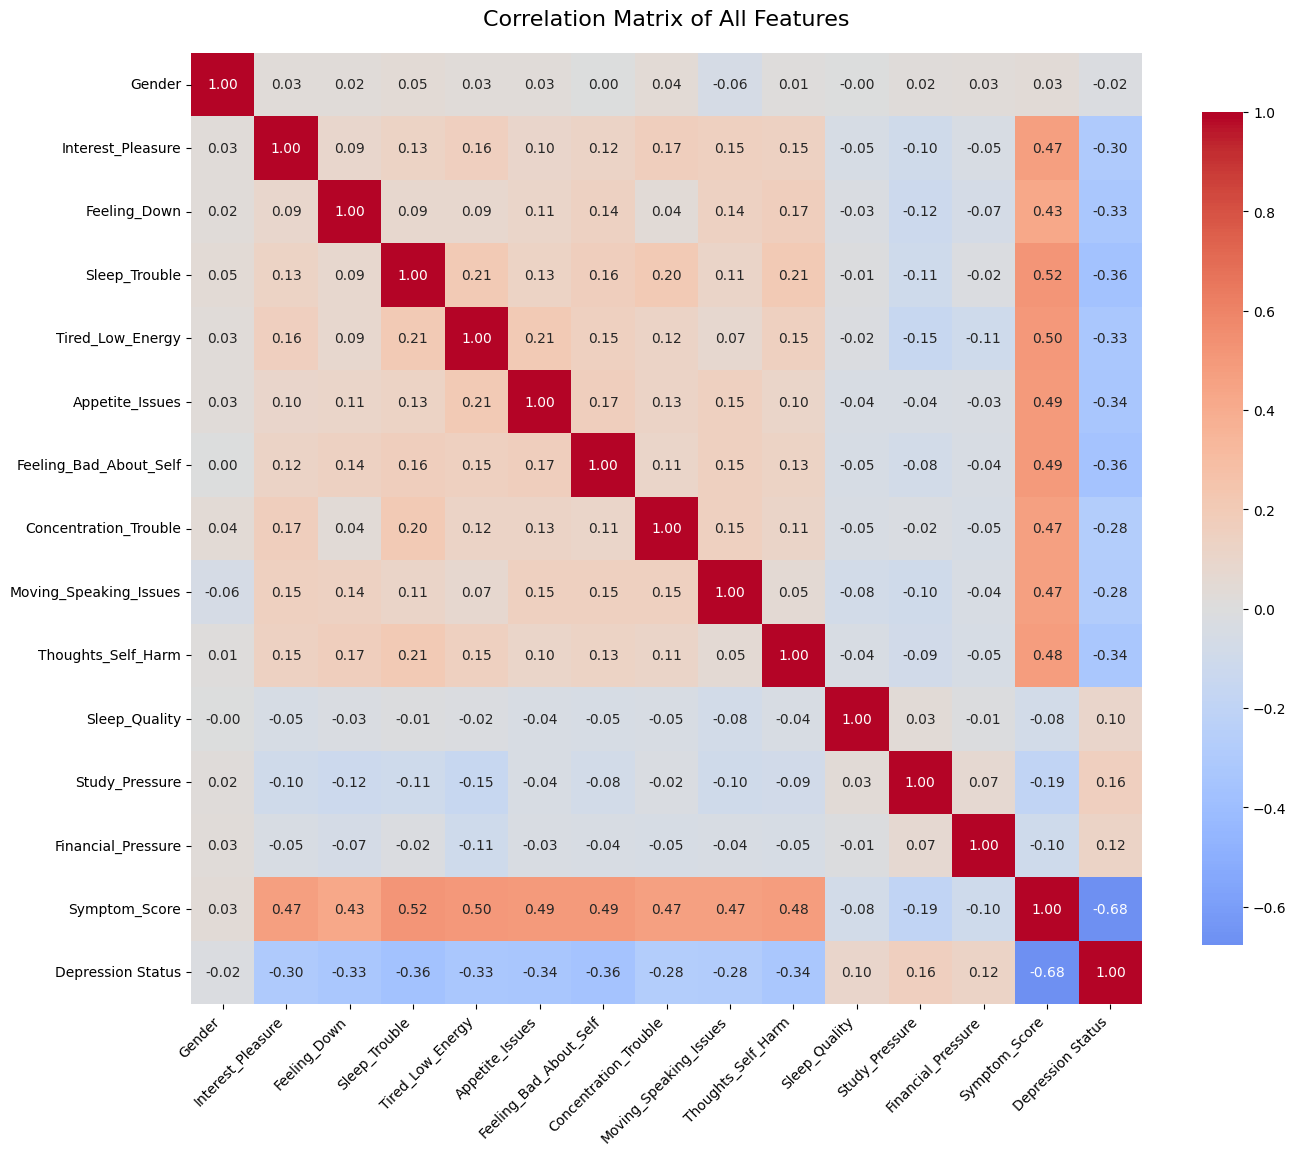

Correlation with Depression Status:
Depression Status         1.000000
Symptom_Score            -0.677633
Sleep_Trouble            -0.364452
Feeling_Bad_About_Self   -0.362578
Appetite_Issues          -0.339998
Thoughts_Self_Harm       -0.335545
Feeling_Down             -0.334499
Tired_Low_Energy         -0.327840
Interest_Pleasure        -0.303986
Moving_Speaking_Issues   -0.283718
Concentration_Trouble    -0.275358
Study_Pressure            0.155664
Financial_Pressure        0.115497
Sleep_Quality             0.095888
Gender                   -0.017087
Name: Depression Status, dtype: float64


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = data.corr()

# Create a larger figure for better readability
plt.figure(figsize=(14, 12))

# Create heatmap with correlation values
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix of All Features', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Display correlation with Depression Status specifically
print("Correlation with Depression Status:")
depression_corr = correlation_matrix['Depression Status'].sort_values(key=abs, ascending=False)
print(depression_corr)
